No 'results.csv' found for run .DS_Store


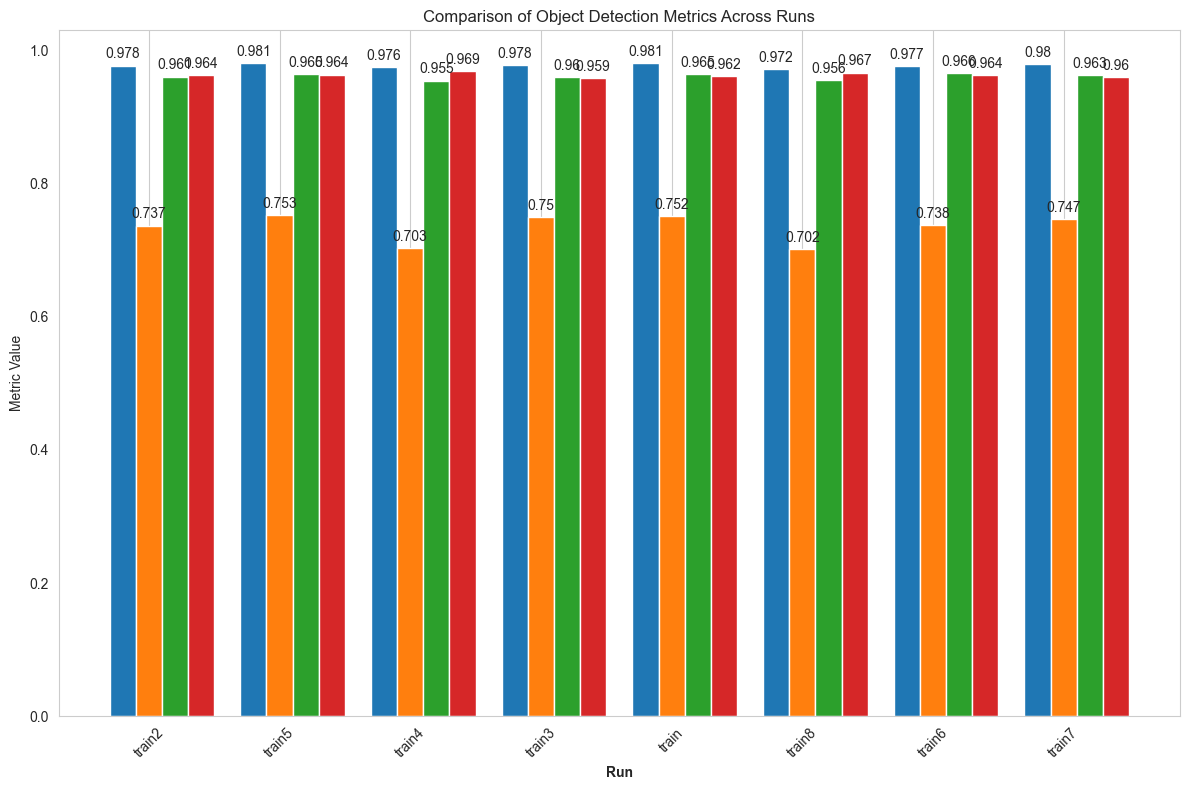

In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("whitegrid")

def plot_metrics_from_runs(runs_dir):
    """
    Plots and annotates mAP@0.5, mAP@0.5:0.95, recall, and precision for each YOLOv8 training run.

    Parameters:
    - runs_dir (str): Directory containing subdirectories for each run, each with a 'results.csv' file.
    """
    if not os.path.isdir(runs_dir):
        print(f"The specified directory {runs_dir} does not exist.")
        return

    metrics = ['       metrics/mAP50(B)', '    metrics/mAP50-95(B)', '      metrics/recall(B)', '   metrics/precision(B)']
    runs_metrics = {metric: [] for metric in metrics}  # Dictionary to store metrics for all runs
    run_names = []  # To store the names of the runs

    for run in os.listdir(runs_dir):
        run_path = os.path.join(runs_dir, run)
        results_file = os.path.join(run_path, 'results.csv')

        if os.path.isfile(results_file):
            data = pd.read_csv(results_file)

            if all(metric in data.columns for metric in metrics):
                for metric in metrics:
                    # Assuming the best (max) value for each metric is desired
                    runs_metrics[metric].append(data[metric].max())
                run_names.append(run)
            else:
                print(f"One or more required metrics columns not found in {results_file}")
        else:
            print(f"No 'results.csv' found for run {run}")

    n_runs = len(run_names)
    n_metrics = len(metrics)

    plt.figure(figsize=(12, 8))
    barWidth = 0.2
    positions = np.arange(n_runs)

    for i, metric in enumerate(metrics):
        bars = plt.bar(positions + i * barWidth, runs_metrics[metric], width=barWidth, label=metric)
        # Annotate each bar with its value
        for bar in bars:
            height = bar.get_height()
            plt.annotate('{}'.format(round(height, 3)),
                         xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')

    plt.xlabel('Run', fontweight='bold')
    plt.xticks([r + barWidth for r in range(n_runs)], run_names, rotation=45)
    plt.ylabel('Metric Value')
    plt.title('Comparison of Object Detection Metrics Across Runs')
    # plt.legend()
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()

# Example usage
runs_directory = "best_run/"
plot_metrics_from_runs(runs_directory)

No 'results.csv' found for run .DS_Store


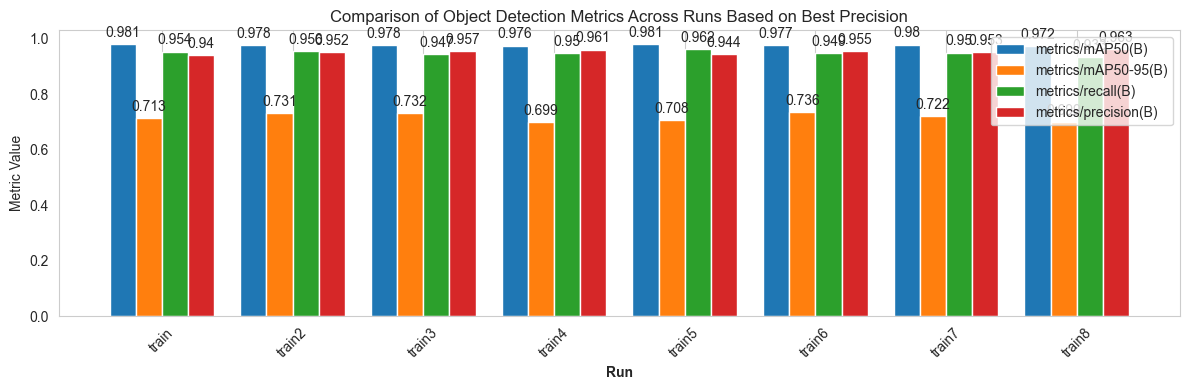

{'       metrics/mAP50(B)': [0.98073, 0.97753, 0.97825, 0.97589, 0.98135, 0.97717, 0.9796, 0.97245], '    metrics/mAP50-95(B)': [0.71311, 0.7309, 0.73169, 0.69925, 0.70774, 0.73627, 0.72166, 0.69876], '      metrics/recall(B)': [0.9539, 0.95582, 0.94654, 0.94969, 0.96168, 0.94916, 0.95021, 0.93286], '   metrics/precision(B)': [0.94008, 0.95198, 0.95668, 0.96143, 0.94441, 0.95479, 0.95281, 0.96268]}


In [27]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_metrics_from_runs(runs_dir):
    """
    Plots and annotates the best row's mAP@0.5, mAP@0.5:0.95, recall, and precision
    for each YOLOv8 training run based on the highest metrics/precision(B).
    """

    metrics = ['       metrics/mAP50(B)', '    metrics/mAP50-95(B)', '      metrics/recall(B)', '   metrics/precision(B)']
    runs_metrics = {metric: [] for metric in metrics}  # Dictionary to store metrics for all runs
    run_names = []  

    for run in sorted(os.listdir(runs_dir)):
        run_path = os.path.join(runs_dir, run)
        results_file = os.path.join(run_path, 'results.csv')

        if os.path.isfile(results_file):
            data = pd.read_csv(results_file)

            if all(metric in data.columns for metric in metrics):
                max_precision_row = data.loc[data[metrics[0]].idxmax()]

                for metric in metrics:
                    runs_metrics[metric].append(max_precision_row[metric])
                
                run_names.append(run)
            else:
                print(f"One or more required metrics columns not found in {results_file}")
        else:
            print(f"No 'results.csv' found for run {run}")

    n_runs = len(run_names)
    n_metrics = len(metrics)

    plt.figure(figsize=(12, 4))
    barWidth = 0.2
    positions = np.arange(n_runs)

    for i, metric in enumerate(metrics):
        bars = plt.bar(positions + i * barWidth, runs_metrics[metric], width=barWidth, label=metric.strip())
        # Annotate each bar with its value
        for bar in bars:
            height = bar.get_height()
            plt.annotate('{}'.format(round(height, 3)),
                         xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')

    plt.xlabel('Run', fontweight='bold')
    plt.xticks([r + barWidth * (n_metrics-1)/2 for r in range(n_runs)], run_names, rotation=45)
    plt.ylabel('Metric Value')
    plt.title('Comparison of Object Detection Metrics Across Runs Based on Best Precision')
    plt.legend()
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()
    print(runs_metrics)

# Example usage
runs_directory = "best_run/"
plot_metrics_from_runs(runs_directory)



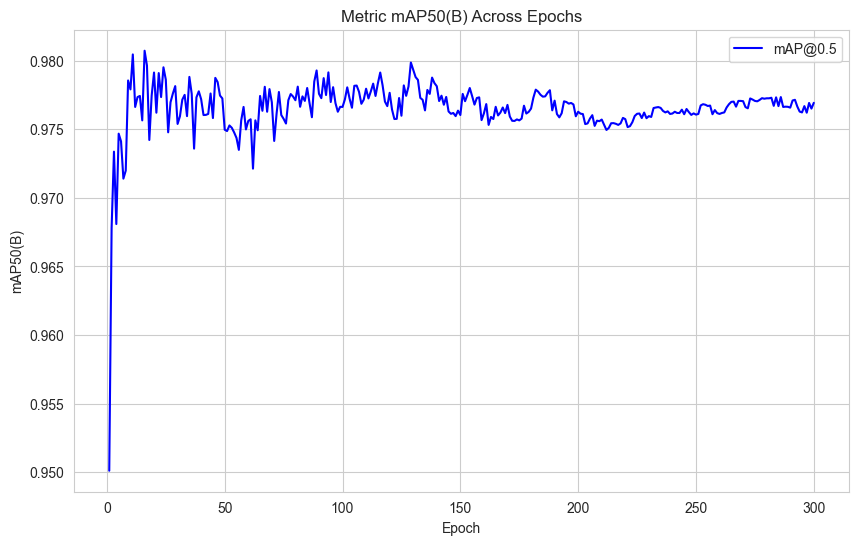

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('best_run/train/results.csv')

# Plotting the metric mAP50(B) across epochs
plt.figure(figsize=(10, 6))
plt.plot(data['                  epoch'], data['       metrics/mAP50(B)'], label='mAP@0.5', color='blue')
plt.title('Metric mAP50(B) Across Epochs')
plt.xlabel('Epoch')
plt.ylabel('mAP50(B)')
plt.grid(True)
plt.legend()
plt.show()


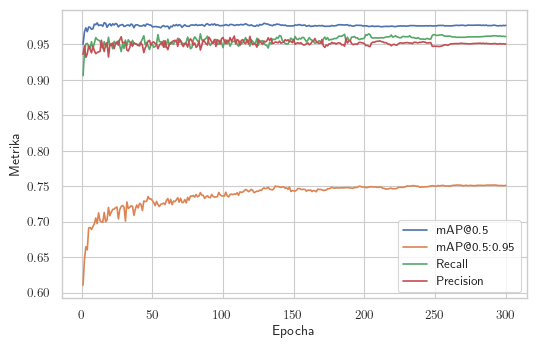

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib
import seaborn as sns

plt.rcParams.update({
    "font.family": "serif",
    "pgf.texsystem": "lualatex",
    "pgf.rcfonts": False,
    "savefig.edgecolor": "ffffff",
    "savefig.facecolor": "ffffff",
    "figure.figsize": (6, 3.75),
    "font.size": "10"
})
save=True
sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("paper" if save else "notebook")

# Define the path to your CSV file
file_path = 'best_run/train/results.csv'

# Check if the file exists
if os.path.exists(file_path):
    # Read the CSV file
    data = pd.read_csv(file_path)
    
    # Create a figure and axis object
    # plt.figure(figsize=(10, 6))
    
    # Plotting each metric on the same graph
    epoch = '                  epoch'
    metrics = ['       metrics/mAP50(B)', '    metrics/mAP50-95(B)', '      metrics/recall(B)', '   metrics/precision(B)']
    plt.plot(data[epoch], data[metrics[0]], label='Precision')
    plt.plot(data[epoch], data[metrics[1]], label='Recall', )
    plt.plot(data[epoch], data[metrics[2]], label='mAP50', )
    plt.plot(data[epoch], data[metrics[3]], label='mAP50-95',)
    
    # Adding title and labels
    # plt.title('Performance Metrics Across Epochs')
    plt.xlabel('Epocha', )
    plt.ylabel('Metrika',)
    plt.legend(['mAP@0.5', 'mAP@0.5:0.95', 'Recall', 'Precision'],)
    plt.grid(True)
    # plt.yticks(fontsize=14)
    # plt.xticks(fontsize=14)
    
    # Show the plot
    plt.savefig('plot.pdf', bbox_inches="tight") 
    plt.show()